# Analyse Exploratoire des Données (EDA)
## Projet : Prédiction de la Performance Étudiante

**Dataset :** Student Performance Factors (Kaggle)  
**Objectif :** Analyser les facteurs influençant les résultats scolaires et préparer les données pour la modélisation  
**Date :** Février 2026

---

## Contexte

Ce projet vise à prédire les performances académiques des étudiants afin d'identifier ceux à risque et d'aider les éducateurs à intervenir de manière proactive. Le dataset contient des informations sur les habitudes d'étude, l'assiduité, l'implication parentale et d'autres facteurs susceptibles d'influencer la réussite scolaire.

---

## Table des matières
1. [Import des librairies](#1-import-des-librairies)
2. [Chargement des données](#2-chargement-des-données)
3. [Exploration initiale](#3-exploration-initiale)
4. [Analyse de la variable cible](#4-analyse-de-la-variable-cible)
5. [Détection d'outliers](#5-détection-doutliers)
6. [Analyse des corrélations](#6-analyse-des-corrélations)
7. [Analyse des variables catégorielles](#7-analyse-des-variables-catégorielles)
8. [Analyse bivariée](#8-analyse-bivariée)
9. [Conclusions](#9-conclusions)

---
## 1. Import des Librairies

In [9]:
# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration des graphiques
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Affichage des avertissements
import warnings
warnings.filterwarnings('ignore')

print("Librairies importées avec succès")

Librairies importées avec succès


---
## 2. Chargement des Données

In [10]:
# Chargement du dataset
df = pd.read_csv("../data/raw/StudentPerformanceFactors.csv")

print(f"Dimensions du dataset : {df.shape[0]} lignes × {df.shape[1]} colonnes")

Dimensions du dataset : 6607 lignes × 20 colonnes


---
## 3. Exploration Initiale

Aperçu général du dataset pour comprendre sa structure et identifier les types de variables.

In [11]:
# Premières lignes du dataset
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [12]:
# Informations sur les types de données et valeurs manquantes
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   str  
 3   Access_to_Resources         6607 non-null   str  
 4   Extracurricular_Activities  6607 non-null   str  
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   str  
 8   Internet_Access             6607 non-null   str  
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   str  
 11  Teacher_Quality             6529 non-null   str  
 12  School_Type                 6607 non-null   str  
 13  Peer_Influence              6607 non-null   str  
 14  Physical_Activity  

In [13]:
# Identification des variables numériques et catégorielles
num_vars = df.select_dtypes(include=np.number).columns.tolist()
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

print(f"Variables numériques ({len(num_vars)}) : {num_vars}")
print(f"\nVariables catégorielles ({len(cat_vars)}) : {cat_vars}")

Variables numériques (7) : ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

Variables catégorielles (13) : ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [14]:
# Analyse des valeurs manquantes
print("Valeurs manquantes par variable :")
print(df.isna().sum())
print(f"\nPourcentage de valeurs manquantes : {(df.isna().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

Valeurs manquantes par variable :
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Pourcentage de valeurs manquantes : 0.18%


In [15]:
# Vérification des doublons
duplicates = df.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")

Nombre de doublons : 0


In [16]:
# Statistiques descriptives des variables numériques
df[num_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


### Observations initiales

**Dataset :**
- 6607 étudiants
- 20 variables (19 features + 1 cible : Exam_Score)
- Aucun doublon
- Très peu de valeurs manquantes (<2% du dataset total)

**Valeurs manquantes :**
- Teacher_Quality : 78 valeurs manquantes (1.2%)
- Parental_Education_Level : 90 valeurs manquantes (1.4%)
- Distance_from_Home : 67 valeurs manquantes (1.0%)

**Types de variables :**
- 7 variables numériques : Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity, Exam_Score
- 13 variables catégorielles : informations socio-économiques, facteurs scolaires, et caractéristiques personnelles

---
## 4. Analyse de la Variable Cible

La variable cible est **Exam_Score** (score à l'examen). Analysons sa distribution pour comprendre ce qu'on cherche à prédire.

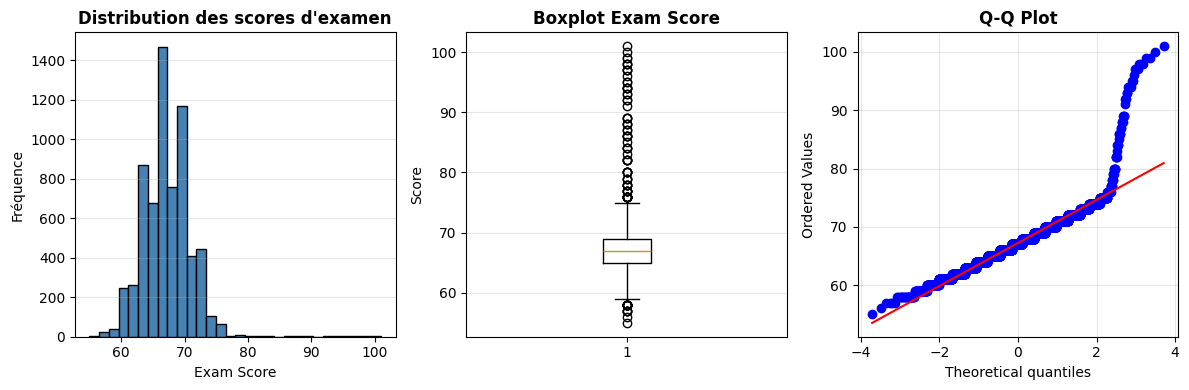

Skewness (asymétrie) : 1.64
Kurtosis (aplatissement) : 10.58


In [17]:
# Distribution de Exam_Score
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df['Exam_Score'], bins=30, edgecolor='black', color='steelblue')
plt.title('Distribution des scores d\'examen', fontsize=12, fontweight='bold')
plt.xlabel('Exam Score')
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 3, 2)
plt.boxplot(df['Exam_Score'])
plt.title('Boxplot Exam Score', fontsize=12, fontweight='bold')
plt.ylabel('Score')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 3, 3)
stats.probplot(df['Exam_Score'], dist="norm", plot=plt)
plt.title('Q-Q Plot', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques de forme
print(f"Skewness (asymétrie) : {df['Exam_Score'].skew():.2f}")
print(f"Kurtosis (aplatissement) : {df['Exam_Score'].kurtosis():.2f}")

### Observations sur Exam_Score

**Distribution :**
- La majorité des scores sont concentrés entre 65 et 70 points
- Distribution asymétrique à droite (Skewness = 1.64)
- Présence de nombreux outliers positifs (scores > 80)

**Normalité :**
- Le Q-Q plot montre que la distribution n'est pas normale (déviation de la ligne rouge)
- Kurtosis élevé (10.58) indique une distribution très pointue avec des queues épaisses

**Implications pour la modélisation :**
- La forte concentration des valeurs dans une plage étroite rendra la prédiction précise plus difficile
- Les modèles devront être capables de capturer les nuances dans un intervalle restreint (65-70)
- Les outliers positifs représentent des étudiants avec d'excellentes performances

---
## 5. Détection d'Outliers

Identification des valeurs aberrantes dans les variables numériques à l'aide de la méthode IQR (Interquartile Range).

In [18]:
# Vérifier les scores > 100 (anomalie)
print(f"Scores > 100 : {df[df['Exam_Score'] > 100].shape[0]}")
if df[df['Exam_Score'] > 100].shape[0] > 0:
    print("\nDétail des scores > 100 :")
    print(df[df['Exam_Score'] > 100][['Exam_Score', 'Previous_Scores', 'Hours_Studied']])

Scores > 100 : 1

Détail des scores > 100 :
      Exam_Score  Previous_Scores  Hours_Studied
1525         101               93             27


In [19]:
# Détection d'outliers pour toutes les variables numériques (méthode IQR)
print("Nombre d'outliers par variable (méthode IQR) :\n")

for col in num_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")

Nombre d'outliers par variable (méthode IQR) :

Hours_Studied: 43 outliers
Attendance: 0 outliers
Sleep_Hours: 0 outliers
Previous_Scores: 0 outliers
Tutoring_Sessions: 430 outliers
Physical_Activity: 0 outliers
Exam_Score: 104 outliers


In [20]:
# Correction du score > 100 (erreur de saisie)
print(f"Avant correction : Exam_Score max = {df['Exam_Score'].max()}")

df.loc[df['Exam_Score'] > 100, 'Exam_Score'] = 100

print(f"Après correction : Exam_Score max = {df['Exam_Score'].max()}")

Avant correction : Exam_Score max = 101
Après correction : Exam_Score max = 100


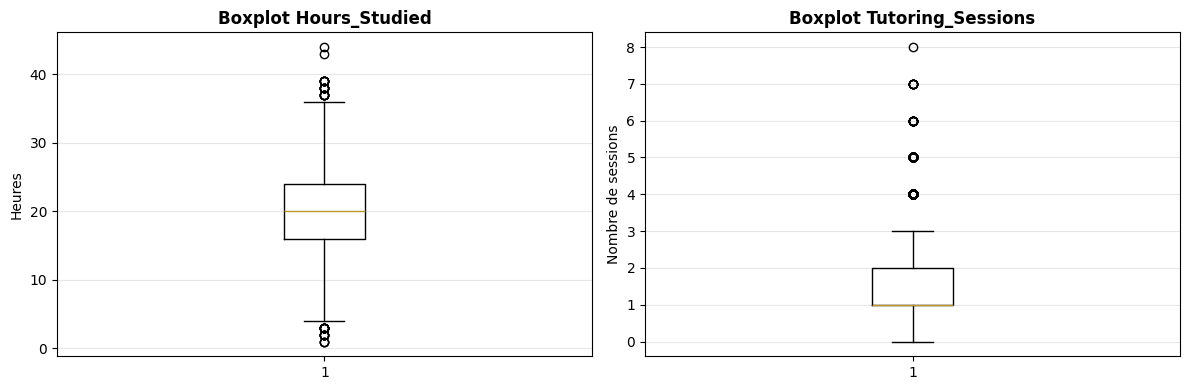

In [21]:
# Visualisation des outliers pour variables clés
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].boxplot(df['Hours_Studied'])
axes[0].set_title('Boxplot Hours_Studied', fontweight='bold')
axes[0].set_ylabel('Heures')
axes[0].grid(axis='y', alpha=0.3)

axes[1].boxplot(df['Tutoring_Sessions'])
axes[1].set_title('Boxplot Tutoring_Sessions', fontweight='bold')
axes[1].set_ylabel('Nombre de sessions')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Décisions sur les outliers

**Exam_Score > 100 :**
- 1 valeur détectée et corrigée à 100 (erreur de saisie évidente)

**Hours_Studied (43 outliers) :**
- Représentent des étudiants qui étudient très peu (1-5h) ou beaucoup (35-44h)
- **Décision : Conservés** - ce sont des cas réels qui font partie de la variabilité naturelle

**Tutoring_Sessions (430 outliers) :**
- Étudiants ayant un nombre élevé de sessions de tutorat (5-8 sessions)
- **Décision : Conservés** - information pertinente sur les étudiants nécessitant du soutien

**Exam_Score (104 outliers) :**
- Scores très bas (<60) ou très élevés (>80)
- **Décision : Conservés** - ces étudiants en difficulté ou excellents sont justement notre cible de prédiction

**Conclusion :**
Seul le score > 100 a été corrigé. Les autres outliers représentent des cas réels et seront conservés pour l'analyse.

---
## 6. Analyse des Corrélations

Étude des relations linéaires entre les variables numériques et identification des features les plus corrélées avec la variable cible.

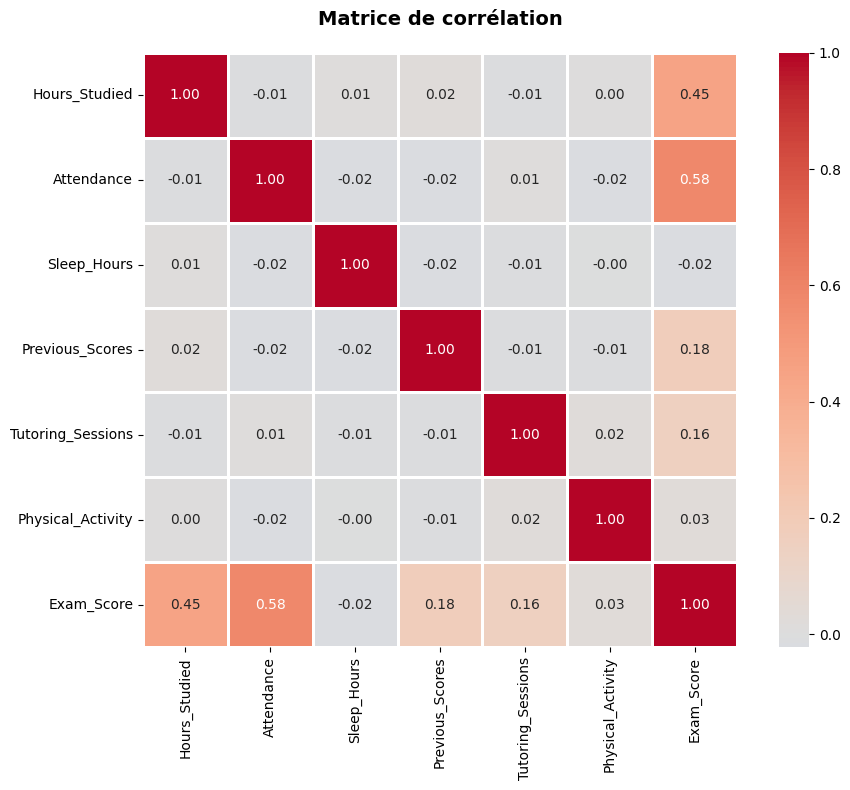

In [22]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Matrice de corrélation', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [23]:
# Corrélations avec la variable cible (triées)
correlations = df[num_vars].corr()['Exam_Score'].sort_values(ascending=False)

print("Corrélations avec Exam_Score (triées par ordre décroissant) :\n")
print(correlations)

Corrélations avec Exam_Score (triées par ordre décroissant) :

Exam_Score           1.000000
Attendance           0.581205
Hours_Studied        0.445558
Previous_Scores      0.175089
Tutoring_Sessions    0.156466
Physical_Activity    0.027832
Sleep_Hours         -0.017000
Name: Exam_Score, dtype: float64


### Analyse de corrélation

**Variables les plus corrélées avec Exam_Score :**

1. **Attendance (0.58)** - Corrélation positive forte
   - La présence en classe est le facteur le plus prédictif de la réussite
   - Les étudiants assidus obtiennent significativement de meilleurs résultats

2. **Hours_Studied (0.45)** - Corrélation positive modérée
   - Le temps d'étude influence les performances de manière notable
   - Deuxième facteur le plus important

3. **Previous_Scores (0.18)** - Corrélation positive faible
   - Les résultats antérieurs ont un impact limité sur le score actuel
   - Suggère que les facteurs actuels (assiduité, travail) sont plus déterminants

**Variables peu/pas corrélées :**
- Tutoring_Sessions (0.16) : impact faible
- Physical_Activity (0.03) : impact quasi nul
- Sleep_Hours (-0.02) : aucune relation linéaire

**Observations importantes :**
- Aucune multicolinéarité forte entre les features (corrélations inter-features < 0.3)
- C'est un bon signe : les variables sont indépendantes les unes des autres
- Certaines variables (Sleep, Physical_Activity) pourraient être peu utiles pour la modélisation

**Implications pour la modélisation :**
- Les features principales à surveiller : Attendance et Hours_Studied
- Feature selection possible pour éliminer les variables peu corrélées

---
## 7. Analyse des Variables Catégorielles

Exploration de la distribution des variables catégorielles pour comprendre la composition du dataset.

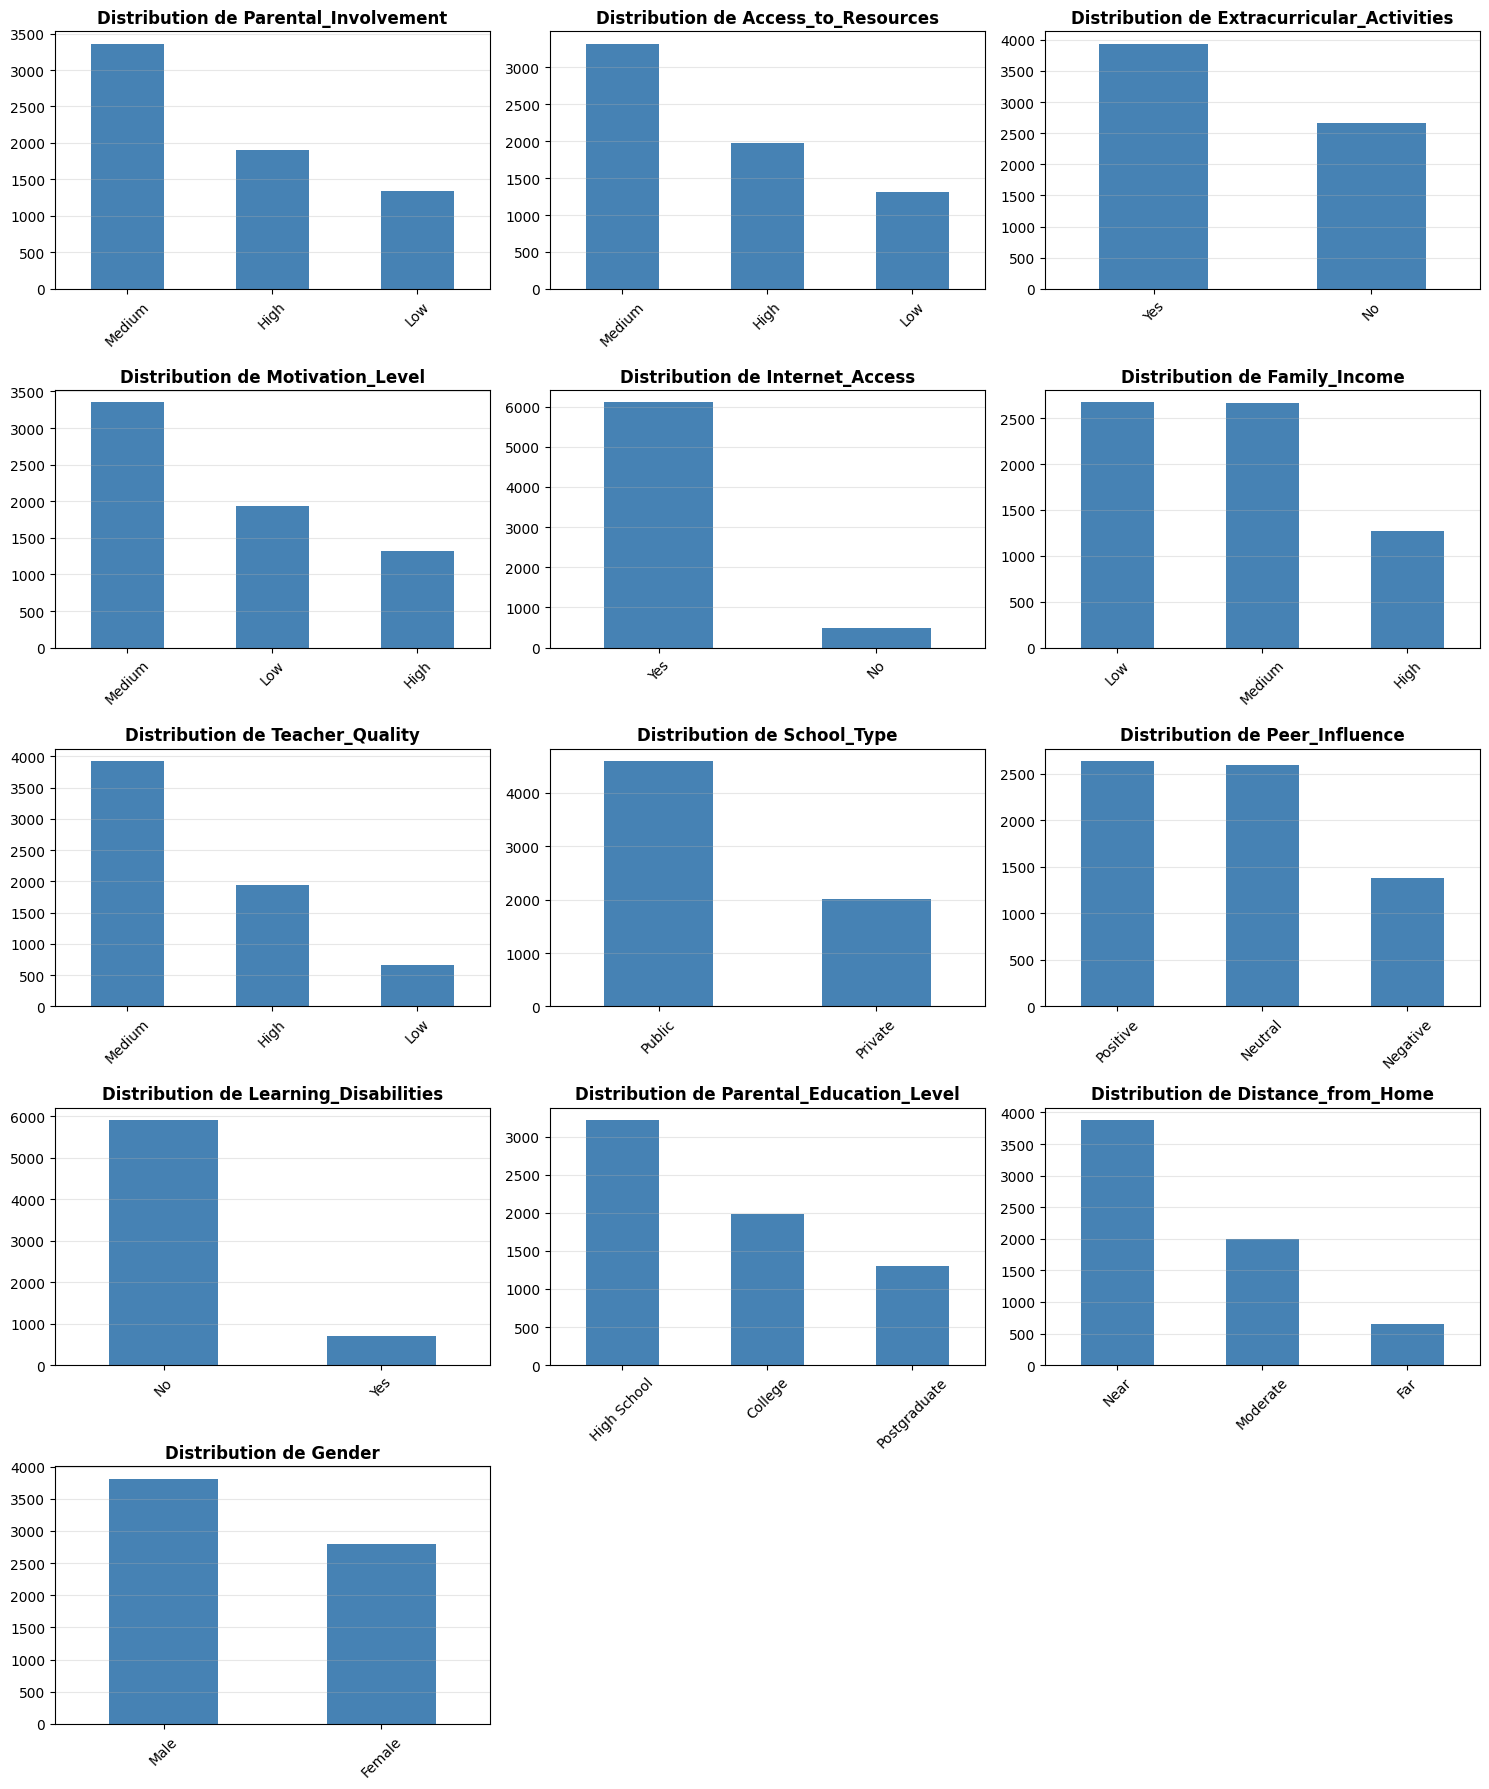

In [24]:
# Distribution des variables catégorielles
fig, axes = plt.subplots(5, 3, figsize=(15, 18))
axes = axes.ravel()

for i, col in enumerate(cat_vars):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color='steelblue')
    axes[i].set_title(f'Distribution de {col}', fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)

# Masquer les axes non utilisés
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Observations sur les variables catégorielles

**Variables socio-économiques :**
- **Family_Income** : Distribution équilibrée (Low ≈ Medium > High)
- **Parental_Education_Level** : Décroissante (High School > College > Postgraduate)
- **Access_to_Resources** : Majorité avec accès moyen

**Variables scolaires :**
- **School_Type** : 70% Public, 30% Private
- **Teacher_Quality** : Majorité Medium, peu de Low
- **Extracurricular_Activities** : 60% participent

**Variables personnelles :**
- **Motivation_Level** : Majorité Medium, peu de High (préoccupant)
- **Parental_Involvement** : Majorité Medium
- **Gender** : 58% Male, 42% Female

**Variables très déséquilibrées :**
- **Internet_Access** : 92% Yes (très déséquilibré)
- **Learning_Disabilities** : 91% No (très déséquilibré)

**Implications :**
- Les variables déséquilibrées (Internet_Access, Learning_Disabilities) pourraient être moins utiles
- Le modèle pourrait ignorer les catégories minoritaires

---
## 8. Analyse Bivariée

Étude des relations entre les features et la variable cible (Exam_Score).

### 8.1 Variables catégorielles ordinales vs Exam_Score

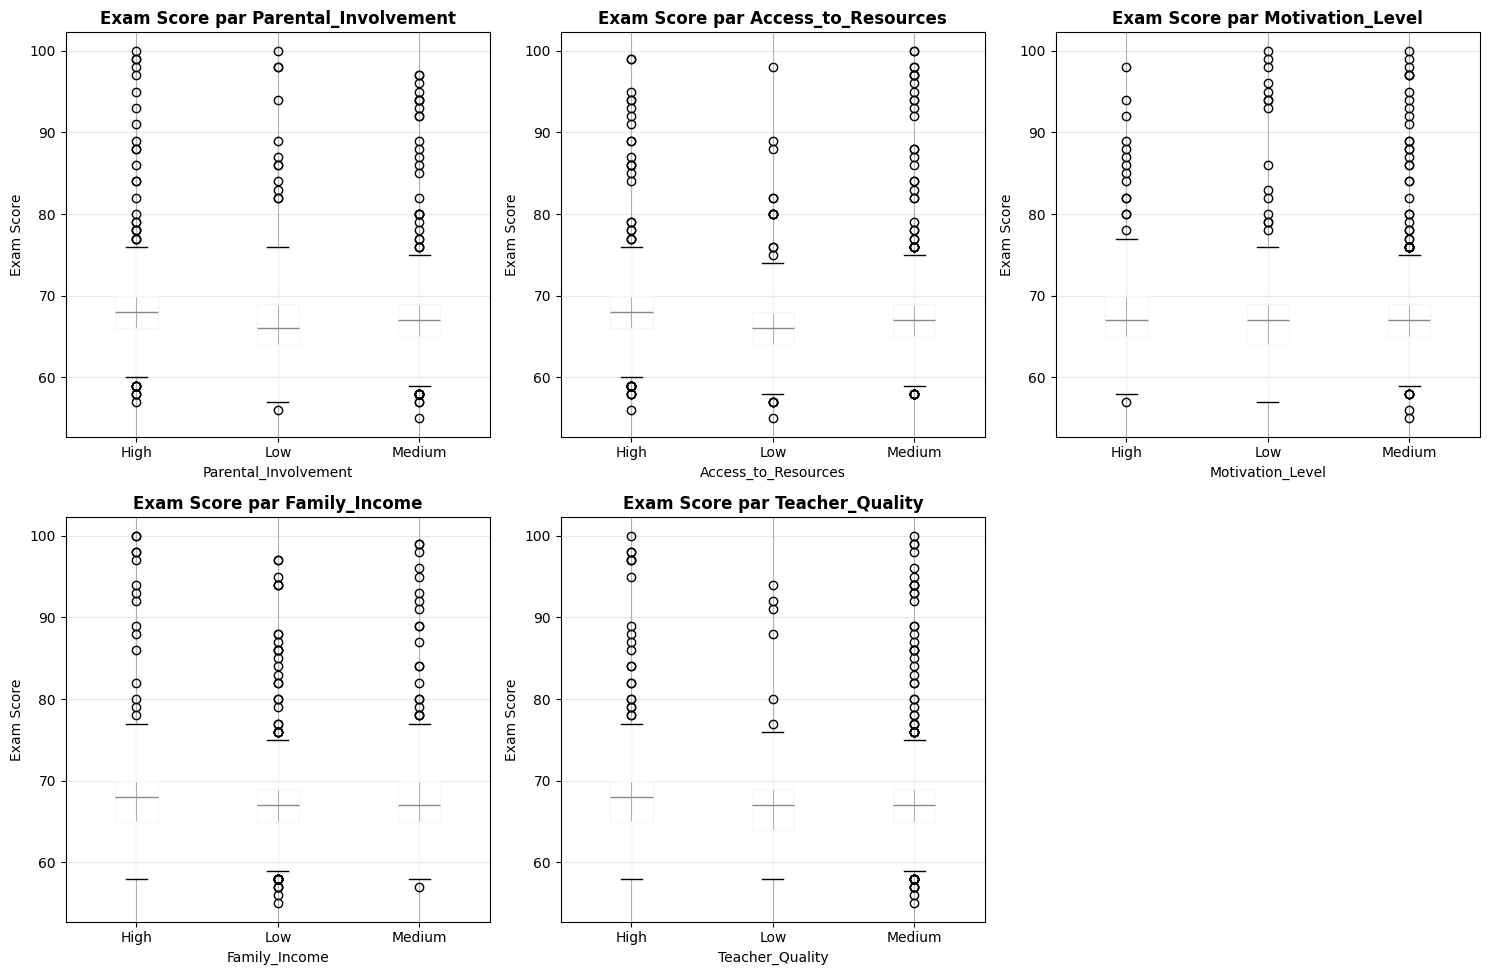

In [25]:
# Boxplots pour variables catégorielles ordinales
ordinal_vars = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 
                'Family_Income', 'Teacher_Quality']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(ordinal_vars):
    df.boxplot(column='Exam_Score', by=col, ax=axes[i])
    axes[i].set_title(f'Exam Score par {col}', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Exam Score')
    axes[i].grid(axis='y', alpha=0.3)

# Masquer l'axe non utilisé
axes[-1].axis('off')

plt.suptitle('')  # Enlever le titre auto-généré
plt.tight_layout()
plt.show()

### 8.2 Variables numériques vs Exam_Score

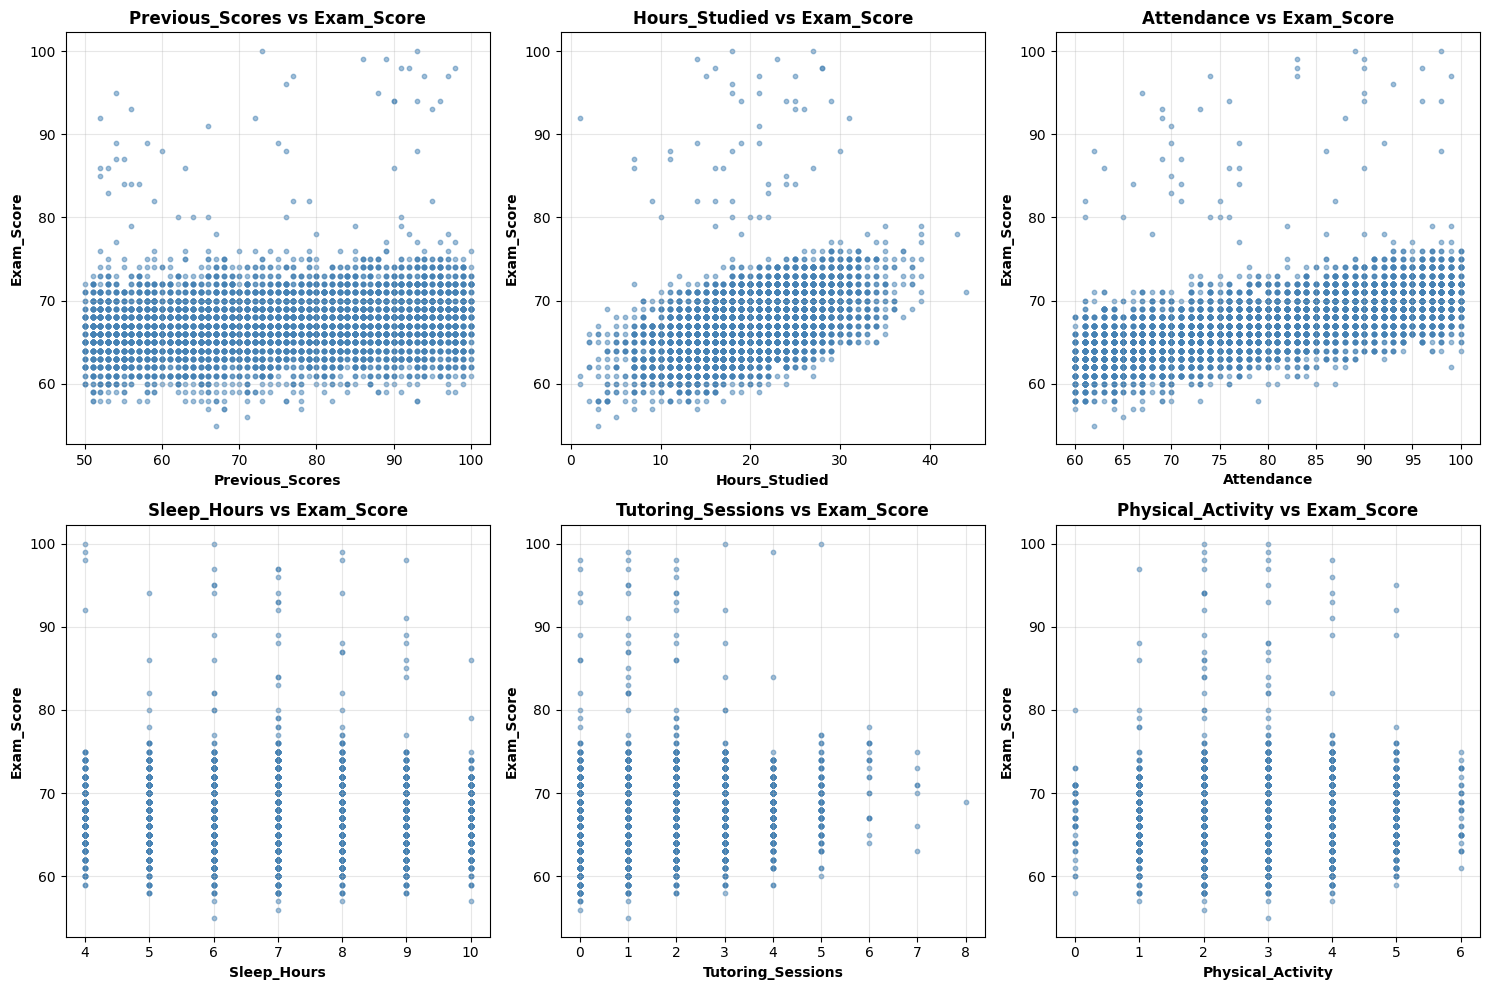

In [26]:
# Scatterplots pour variables numériques clés
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

key_num_vars = ['Previous_Scores', 'Hours_Studied', 'Attendance', 
                'Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity']

for i, col in enumerate(key_num_vars):
    axes[i].scatter(df[col], df['Exam_Score'], alpha=0.5, s=10, color='steelblue')
    axes[i].set_xlabel(col, fontweight='bold')
    axes[i].set_ylabel('Exam_Score', fontweight='bold')
    axes[i].set_title(f'{col} vs Exam_Score', fontweight='bold')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Analyse bivariée : Relations avec Exam_Score

#### Variables catégorielles ordinales

**Observation surprenante :**
Les variables ordinales (Parental_Involvement, Access_to_Resources, Motivation_Level, Family_Income, Teacher_Quality) ne montrent **aucune différence significative** entre leurs catégories (High/Medium/Low). La médiane reste constante autour de 67 pour toutes les catégories.

**Implications :**
- Ces variables pourraient avoir un impact limité sur la prédiction
- Leur effet est peut-être indirect ou masqué par d'autres facteurs (Attendance, Hours_Studied)
- À surveiller lors de la feature selection

#### Variables numériques

**Relations positives claires :**

1. **Attendance (corrélation forte)**
   - Tendance croissante nette et visible dans le scatterplot
   - Plus l'assiduité augmente, plus le score augmente
   - Variable la plus prédictive confirmée visuellement

2. **Hours_Studied (corrélation modérée)**
   - Tendance croissante modérée
   - Impact visible mais moins prononcé qu'Attendance

**Relations faibles/inexistantes :**

3. **Previous_Scores** : Nuage dispersé, peu de structure visible
4. **Sleep_Hours** : Aucune tendance, colonnes verticales (pas de relation)
5. **Tutoring_Sessions** : Aucune relation claire
6. **Physical_Activity** : Aucun impact visible

**Conclusion :**
Les analyses bivariées confirment que **Attendance et Hours_Studied** sont les deux seules variables avec un impact visible et fort sur Exam_Score. Les autres variables semblent peu informatives pour la prédiction.

---
## 9. Conclusions

### Résumé des insights clés

#### Dataset
- 6607 étudiants avec 20 variables (19 features + 1 cible)
- Dataset très propre : aucun doublon, <2% de valeurs manquantes
- Variable cible (Exam_Score) fortement concentrée entre 65-70

#### Variables les plus importantes

**Top 2 features prédictives :**
1. **Attendance (0.58)** - Corrélation forte, impact visuel clair
2. **Hours_Studied (0.45)** - Corrélation modérée, impact visible

**Insight majeur :** La présence en classe est le facteur #1 de réussite scolaire dans ce dataset.

#### Variables peu utiles
- Sleep_Hours, Physical_Activity, Tutoring_Sessions : corrélations quasi-nulles
- Variables catégorielles ordinales : pas de différence visible entre catégories
- Candidats pour la feature selection

#### Points d'attention pour le preprocessing

**Valeurs manquantes :**
- Teacher_Quality (78), Parental_Education_Level (90), Distance_from_Home (67)
- Stratégie recommandée : imputation par le mode (faible impact vu le petit nombre)

**Outliers :**
- 1 score > 100 corrigé
- Autres outliers conservés (cas réels)

**Encodage :**
- Variables ordinales : encodage ordinal (Low=0, Medium=1, High=2)
- Variables nominales : One-Hot Encoding

**Classes déséquilibrées :**
- Internet_Access (92% Yes), Learning_Disabilities (91% No)
- À surveiller lors de la modélisation

### Prochaines étapes

1. **Preprocessing :**
   - Imputation des valeurs manquantes
   - Encodage des variables catégorielles
   - Feature engineering si nécessaire

2. **Modélisation :**
   - Tester plusieurs algorithmes de régression
   - Feature selection basée sur l'importance
   - Optimisation des hyperparamètres

3. **Évaluation :**
   - Métriques : RMSE, MAE, R²
   - Validation croisée
   - Analyse des prédictions

---

**Fin de l'EDA**